In [1]:
# import
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from nctpy.utils import matrix_normalization
from nctpy.metrics import ave_control, modal_control
from nctpy.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
projdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/nctpy'
A = np.load(os.path.join(projdir, 'data', 'pnc_schaefer200_A.npy'))

In [3]:
print(A.shape)

(200, 200, 253)


In [4]:
n_nodes = A.shape[0]
n_subs = A.shape[2]

## Compute strength and controllability statistics

In [5]:
# strength function
def node_strength(A):
    str = np.sum(A, axis=0)

    return str

In [6]:
# containers
s = np.zeros((n_subs, n_nodes))
ac = np.zeros((n_subs, n_nodes))
mc = np.zeros((n_subs, n_nodes))

# define time system
system = 'discrete'

for i in tqdm(np.arange(n_subs)):
    a = A[:, :, i]  # get subject i's A matrix
    s[i, :] = node_strength(a)  # get strength

    a_norm = matrix_normalization(a, system=system)  # normalize subject's A matrix
    ac[i, :] = ave_control(a_norm, system=system)  # get average controllability
    mc[i, :] = modal_control(a_norm)  # get modal controllability

100%|██████████| 253/253 [00:09<00:00, 27.00it/s]


## Plot

In [7]:
# mean over subjects
s_subj_mean = np.mean(s, axis=0)
ac_subj_mean = np.mean(ac, axis=0)
mc_subj_mean = np.mean(mc, axis=0)

# take log transform to normalize
s_subj_mean = np.log(s_subj_mean)
ac_subj_mean = np.log(ac_subj_mean)
mc_subj_mean = np.log(mc_subj_mean)

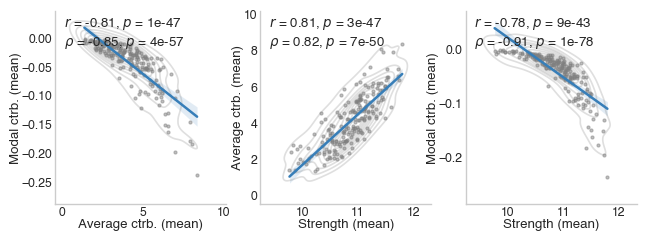

In [8]:
f, ax = plt.subplots(1, 3, figsize=(7.5, 2.5))
reg_plot(x=ac_subj_mean, y=mc_subj_mean,
         xlabel='Average ctrb. (mean)', ylabel='Modal ctrb. (mean)',
         add_spearman=True, ax=ax[0])
reg_plot(x=s_subj_mean, y=ac_subj_mean,
         xlabel='Strength (mean)', ylabel='Average ctrb. (mean)',
         add_spearman=True, ax=ax[1])
reg_plot(x=s_subj_mean, y=mc_subj_mean,
         xlabel='Strength (mean)', ylabel='Modal ctrb. (mean)',
         add_spearman=True, ax=ax[2])
plt.show()
f.savefig(os.path.join(projdir, 'docs', 'source', 'pages', 'examples', 'metric_correlations'),
          dpi=300, bbox_inches='tight', pad_inches=0.1)